In [12]:
import numpy as np 
import cv2 
import matplotlib
from matplotlib import pyplot as plt
from pylab import *
%matplotlib inline

## SHOWING THE SAMPLE IMAGES OF W180, W240 AND DEFECTED CASHEW

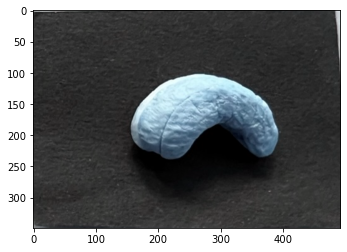

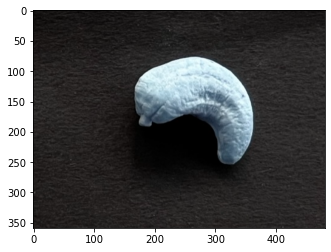

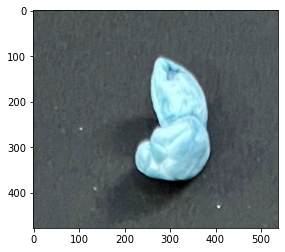

In [14]:
sample_img_180 = cv2.imread(r"C:\Users\hp\IPML Class\dataset\W180\IMG_6785.jpeg")
sample_img_240 = cv2.imread(r"C:\Users\hp\IPML Class\dataset\W240\IMG_6510.jpeg")
sample_img_defect = cv2.imread(r"C:\Users\hp\IPML Class\dataset\Defect\IMG_2.jpg")

figure(0)
plt.imshow(sample_img_180)

figure(1)
plt.imshow(sample_img_240)

figure(2)
plt.imshow(sample_img_defect)

In [16]:
print(sample_img_180.shape)
print(sample_img_240.shape)
print(sample_img_defect.shape)

(349, 493, 3)
(359, 481, 3)
(478, 538, 3)


In [17]:
sample_img_180

array([[[180, 182, 182],
        [187, 189, 189],
        [187, 189, 189],
        ...,
        [208, 215, 218],
        [208, 215, 218],
        [211, 214, 218]],

       [[193, 195, 195],
        [192, 194, 194],
        [191, 193, 193],
        ...,
        [209, 216, 219],
        [209, 216, 219],
        [212, 215, 219]],

       [[158, 160, 160],
        [155, 157, 157],
        [154, 156, 156],
        ...,
        [209, 216, 219],
        [208, 215, 218],
        [211, 214, 218]],

       ...,

       [[141, 143, 144],
        [142, 144, 145],
        [131, 133, 134],
        ...,
        [ 64,  63,  65],
        [ 62,  61,  63],
        [ 59,  58,  60]],

       [[142, 144, 145],
        [140, 142, 143],
        [130, 132, 133],
        ...,
        [ 64,  63,  67],
        [ 61,  60,  62],
        [ 58,  57,  59]],

       [[140, 142, 143],
        [139, 141, 142],
        [132, 134, 135],
        ...,
        [ 62,  61,  65],
        [ 59,  58,  62],
        [ 56,  55,  57]]

In [18]:
sample_img_240

array([[[26, 24, 23],
        [27, 25, 24],
        [21, 19, 18],
        ...,
        [23, 21, 21],
        [23, 21, 21],
        [17, 17, 17]],

       [[25, 23, 22],
        [24, 22, 21],
        [17, 15, 14],
        ...,
        [25, 23, 23],
        [27, 25, 25],
        [28, 28, 28]],

       [[19, 17, 16],
        [20, 18, 17],
        [18, 16, 15],
        ...,
        [22, 20, 20],
        [24, 22, 22],
        [29, 29, 29]],

       ...,

       [[27, 23, 22],
        [30, 26, 25],
        [34, 30, 29],
        ...,
        [47, 43, 42],
        [46, 42, 41],
        [46, 44, 44]],

       [[27, 23, 22],
        [30, 26, 25],
        [32, 28, 27],
        ...,
        [41, 37, 36],
        [41, 37, 36],
        [39, 37, 37]],

       [[28, 24, 23],
        [30, 26, 25],
        [31, 27, 26],
        ...,
        [37, 33, 32],
        [37, 33, 32],
        [34, 32, 32]]], dtype=uint8)

In [19]:
sample_img_defect

array([[[71, 76, 77],
        [77, 82, 83],
        [84, 89, 90],
        ...,
        [77, 84, 87],
        [81, 88, 91],
        [82, 89, 92]],

       [[81, 86, 87],
        [80, 85, 86],
        [81, 86, 87],
        ...,
        [80, 87, 90],
        [84, 91, 94],
        [84, 91, 94]],

       [[83, 88, 89],
        [81, 86, 87],
        [80, 85, 86],
        ...,
        [81, 88, 91],
        [80, 87, 90],
        [81, 88, 91]],

       ...,

       [[82, 88, 93],
        [83, 89, 94],
        [82, 88, 93],
        ...,
        [79, 87, 87],
        [84, 92, 92],
        [84, 92, 92]],

       [[83, 89, 94],
        [83, 89, 94],
        [83, 89, 94],
        ...,
        [79, 87, 87],
        [80, 88, 88],
        [81, 89, 89]],

       [[82, 88, 93],
        [83, 89, 94],
        [84, 90, 95],
        ...,
        [80, 88, 88],
        [78, 86, 86],
        [80, 88, 88]]], dtype=uint8)

In [39]:
def resize(image_path):
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (300,300))
    return resized_img    

In [41]:
path_to_data = "./dataset"
path_to_resized_data = "./dataset/resized/"

In [35]:
import os
img_dirs = list()
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [36]:
img_dirs

['./dataset\\Defect', './dataset\\W180', './dataset\\W240']

In [37]:
import shutil
if os.path.exists(path_to_resized_data):
    shutil.rmtree(path_to_resized_data)
os.mkdir(path_to_resized_data)

In [43]:
resize_img_dirs = list()
file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    grade = img_dir.split('\\')[-1]
    print(grade)
    
    file_name_dict[grade] = list()
    
    for entry in os.scandir(img_dir):
        resized_img = resize(entry.path)
        if resized_img is not None:
            resized_folder = path_to_resized_data + grade
            if not os.path.exists(resized_folder):
                os.makedirs(resized_folder)
                resize_img_dirs.append(resized_folder)
                print("Generating resized images in folder",resized_folder)
                
            resized_file_name = grade + str(count) + ".png"
            resized_file_path = resized_folder + "/" + resized_file_name
            
            cv2.imwrite(resized_file_path, resized_img)
            file_name_dict[grade].append(resized_file_path)
            count += 1

Defect
Generating resized images in folder ./dataset/resized/Defect
W180
Generating resized images in folder ./dataset/resized/W180
W240
Generating resized images in folder ./dataset/resized/W240


## DEFINING WAVELET TRANSFORM FUNCTION

In [44]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [45]:
class_dict = {}
count = 0
for grade in file_name_dict.keys():
    class_dict[grade] = count
    count += 1
class_dict

{'Defect': 0, 'W180': 1, 'W240': 2}

In [54]:
X = list()
y = list()

for grade, training_files in file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        img_transform = w2d(img, 'db1',5)
        combined_img = np.vstack((img.reshape(300*300*3,1), img_transform.reshape(300*300,1)))
        X.append(combined_img)
        y.append(class_dict[grade])

In [56]:
X = np.array(X).reshape(len(X),len(X[0])).astype(float)

In [57]:
X.shape

(534, 360000)

In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9925373134328358

In [62]:
X_train[0]

array([ 76.,  84.,  83., ..., 253.,   0., 250.])

In [60]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.98      0.99        42
           2       0.99      1.00      0.99        71

    accuracy                           0.99       134
   macro avg       1.00      0.99      0.99       134
weighted avg       0.99      0.99      0.99       134



In [85]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [86]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [87]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.9975,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.9975,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.9925,{'logisticregression__C': 1}


In [88]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [89]:
print(best_estimators['svm'].score(X_test,y_test))
print(best_estimators['random_forest'].score(X_test,y_test))
print(best_estimators['logistic_regression'].score(X_test,y_test))

0.9925373134328358
0.9925373134328358
0.9850746268656716


In [90]:
best_clf = best_estimators['svm']

In [91]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [92]:
import json 
with open("class_dict.json","w") as f:
    f.write(json.dumps(class_dict))

### Thank YOU!!!